<a href="https://colab.research.google.com/github/Athrudev/Athrudev/blob/main/Expense_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Add a new transaction
2. View transaction and summary within a date range
3. Exit
Enter your choice(1-3): 2
Enter the start date (dd-mm-yyyy): 01-07-2024
Enter the end date(dd-mm-yyyy): 29-07-2024
transaction from 01-07-2024 to 29-07-2024
      date  amount category         description
01-07-2024   545.0  Expense            bus pass
03-07-2024    25.5  Expense               lunch
05-07-2024  1200.0   Income              salary
07-07-2024    80.0  Expense           groceries
10-07-2024    35.0  Expense       movie tickets
12-07-2024   150.0  Expense    electricity bill
15-07-2024   120.5  Expense           groceries
17-07-2024    60.0  Expense                 gas
20-07-2024   200.0  Expense dinner with friends
22-07-2024    45.0  Expense               books
25-07-2024   500.0   Income      freelance work
27-07-2024    30.0  Expense             haircut
29-07-2024    70.0  Expense             clothes

Summary:
Total Income: 1700.00
Total Expense: 1361.00 
Net Saving: 339.00
Do you wan

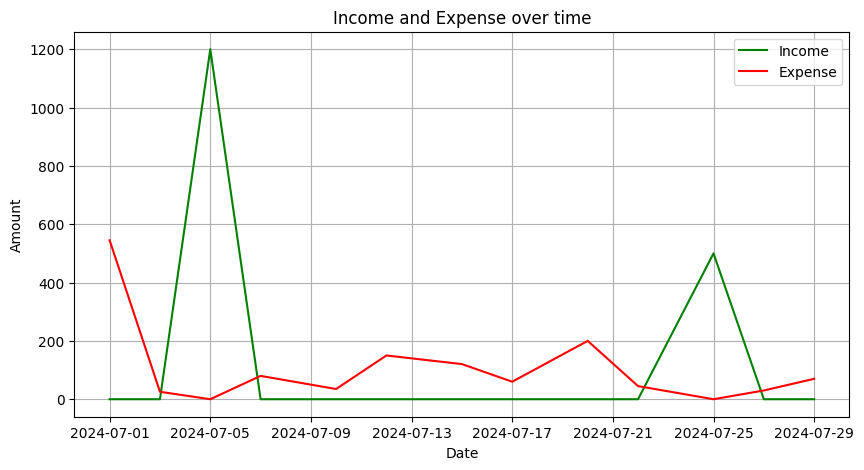


1. Add a new transaction
2. View transaction and summary within a date range
3. Exit


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
from datetime import datetime


date_format= "%d-%m-%Y"
CATEGORIES={'I':'Income','E':'Expense'}
class CSV:
  CSV_FILE="finance_data.csv"
  COLUMNS=["date","amount","category","description"]

  @classmethod
  def initialise_csv(cls):
    try:
      pd.read_csv(cls.CSV_FILE)
    except FileNotFoundError:
      df=pd.DataFrame(columns=cls.COLUMNS)
      df.to_csv(cls.CSV_FILE,index=False)

  @classmethod
  def add_entry(cls,date,amount,category,description):
      new_entry={
          "date":date,
          "amount":amount,
          "category":category,
          "description":description,
      }

      with open(cls.CSV_FILE,"a",newline="") as csvfile:
        writer=csv.DictWriter(csvfile,fieldnames=cls.COLUMNS)
        writer.writerow(new_entry)
      print("added successfully...!")

  @classmethod
  def get_transaction(cls,start_date,end_date):
    df=pd.read_csv(cls.CSV_FILE)
    df['date']=pd.to_datetime(df['date'],format=date_format)
    start_date=datetime.strptime(start_date,date_format)
    end_date=datetime.strptime(end_date,date_format)

    mask=(df['date']>=start_date) & (df['date']<=end_date)

    filtered_df=df.loc[mask]

    if filtered_df.empty:
      print("No transaction found in the given date range.")
    else:
      print(f"transaction from {start_date.strftime(date_format)} to {end_date.strftime(date_format)}")

      print(filtered_df.to_string(
          index=False,formatters={"date": lambda x:x.strftime(date_format)}
      ))
      total_income=filtered_df[filtered_df['category']=="Income"]['amount'].sum()
      total_Expenses=filtered_df[filtered_df['category']=="Expense"]['amount'].sum()
      net_saving=total_income-total_Expenses

      print("\nSummary:")
      print(f"Total Income: {total_income:.2f}")
      print(f"Total Expense: {total_Expenses:.2f} ")
      print(f"Net Saving: {net_saving:.2f}")

    return filtered_df





def get_date(prompt,allow_default=False):
  date_str=input(prompt)
  if allow_default and not date_str:
    return datetime.today().strftime(date_format)

  try:
    valid_date=datetime.strptime(date_str,date_format)
    return valid_date.strftime(date_format)
  except ValueError:
    print("Invalid date format. Please enter the date in dd-mm-yyyy format.")
    return get_date(prompt,allow_default)

def get_amount():
  amount=float(input("Enter the amount: "))
  try:
    if amount<=0:
      raise ValueError("Amount must be non-negative non-zero value.")
    return amount
  except ValueError as e:
    print(e)
    return get_amount()


def get_category():
  category=input("Enter the category ('I' for Income or 'E' for Expense): ").upper()
  if category in CATEGORIES:
    return CATEGORIES[category]

  print("Invalid category. Please enter 'I' for Income or 'E' for Expense.")
  return get_category()

def get_description():
  return input("Enter a description (optional): ")




def add():
  CSV.initialise_csv()
  date=get_date(
      "Enter the date of transaction (dd-mm-yyyy) or enter for today's date: ",
      allow_default=True
  )
  amount=get_amount()
  category=get_category()
  description=get_description()
  CSV.add_entry(date,amount,category,description)


def plot_transaction(df):
  df.set_index("date",inplace=True)

  income_df=(
   df[df['category']=='Income']
   .resample("D")
   .sum()
   .reindex(df.index,fill_value=0)
  )

  expense_df=(
   df[df['category']=='Expense']
   .resample("D")
   .sum()
   .reindex(df.index,fill_value=0)
  )

  plt.figure(figsize=(10,5))
  plt.plot(income_df.index,income_df['amount'],label='Income',color='g')
  plt.plot(expense_df.index,expense_df['amount'],label='Expense',color='r')
  plt.xlabel("Date")
  plt.ylabel("Amount")
  plt.title("Income and Expense over time")
  plt.legend()
  plt.grid(True)
  plt.show()



def main():
  while True:
    print("\n1. Add a new transaction")
    print("2. View transaction and summary within a date range")
    print("3. Exit")

    c=input("Enter your choice(1-3): ")

    if c=="1":
      add()
    elif c=="2":
      start_date=input("Enter the start date (dd-mm-yyyy): ")
      end_date=input("Enter the end date(dd-mm-yyyy): ")
      df=CSV.get_transaction(start_date,end_date)
      if input("Do you want to see a plot (y/n): ").lower()=='y':
        plot_transaction(df)
    elif c=="3":
      print("Exiting......")
      break
    else:
      print("Invalid choice. Enter 1, 2, or 3. ")


if __name__=='__main__':
  main()


